# Assignment 2 - Machine Learning Basics

## *Prajwal Vijendra*
Netid:  *pv47*

Github link: *https://github.com/prajwal-vijendra/machine-learning-course*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

    1. When the sample size is large and the number of predictors are small, the performance of flexible method would be better than inflexible method because fexible model will have a better fit to the data.
    
    2. When the observations are small and predictors are large, flexible method would peform worse than inflexible method because flexible models would overfit the data.
    
    3. When the relation between predictors and response is highly non-linear, flexible method would be better as it would have a good fit to the data.
    
    4. When the variance of the error term is high, flexible method would peform worse than the inflexible method as flexible model would fit to the noise in the data.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

a. 
1. It is a regression problem as the response variable is CEO salary, which is a continuous value.
2. Here we are more interested in the inference than prediction 
3. The sample size n = 500 and predictors p= 3

b.
1. It is a classification problem as the repsonse variable is a binary value, ie. Success or Failure
2. Here we are more interested in prediction than inference.
3. The sample size n = 20 and predictors p = 13

c. 
1. It is a regression problem as the repsonse variable is percent change in US dollar, which is a continuous value.
2. Here we are more intereted in prediction.
3. The sample size n = 52 and predictors p = 3

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [1]:
# (a) Write your own kNN classifier
import numpy as np
import pandas as pd

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x = None
        self.y = None
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x.values
        self.y = y.values
        
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        for row in x.values:
            label = self.nearest_distance(row, k)
            y_hat.append(label)
        # Return the estimated targets
        return y_hat
    
    def nearest_distance(self, r, k):
        label =[]
        dist = [self.euc_distance(r, row) for row in self.x]  
        best_dist = sorted(dist)
        best_dist = best_dist[:k]
        for i in best_dist:
            index = dist.index(i)
            y = self.y[index][0]
            label.append(y)
        return max(label, key= label.count)
        
        
    def euc_distance(self, a,b):
        return np.linalg.norm(a-b)
        

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [2]:
#(b)

import pandas as pd
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import time

train_low = pd.read_csv('Data/A2_X_train_low.csv',  header=None)
y_train_low = pd.read_csv('Data/A2_y_train_low.csv',  header=None)
test_low = pd.read_csv('Data/A2_X_test_low.csv',  header=None)
y_test_low = pd.read_csv('Data/A2_y_test_low.csv',  header=None)

train_high = pd.read_csv('Data/A2_X_train_high.csv',  header=None)
y_train_high = pd.read_csv('Data/A2_y_train_high.csv',  header=None)
test_high = pd.read_csv('Data/A2_X_test_high.csv',  header=None)
y_test_high = pd.read_csv('Data/A2_y_train_high.csv',  header=None)

In [3]:
#(c)

knn = Knn()
s1 = time.time()
fit = knn.fit(train_low, y_train_low)
result = knn.predict(test_low, 5)
e1 = time.time()
score1 = metrics.accuracy_score(y_test_low, result)

sknn = KNeighborsClassifier(n_neighbors=5)
s2 = time.time()
fit = sknn.fit(train_low,y_train_low.values.ravel())
result_2 = sknn.predict(test_low)
e2 = time.time()
score2 = metrics.accuracy_score(y_test_low, result_2)

print("Low dimensional dataset:")
print(f"Handwritten KNN accuracy: {score1} and the computation time was: {e1-s1} s")
print(f"Sklearn KNN accuracy: {score2} and the computation time was: {e2-s2} s")

Low dimensional dataset:
Handwritten KNN accuracy: 0.925 and the computation time was: 8.06541895866394 s
Sklearn KNN accuracy: 0.925 and the computation time was: 0.005984067916870117 s


In [4]:
knn = Knn()
s1 = time.time()
fit_2 = knn.fit(train_high, y_train_high)
result_2 = knn.predict(test_high, 5)
e1 = time.time()
score1 = metrics.accuracy_score(y_test_high, result_2)


sknn = KNeighborsClassifier(n_neighbors=5)
s2 = time.time()
sknn.fit(train_high,y_train_high.values.ravel())
result_2 = sknn.predict(test_high)
e2 = time.time()
score2 = metrics.accuracy_score(y_test_high, result_2)

print("High dimensional dataset:")
print(f"Handwritten KNN accuracy: {score1} and the computation time was: {e1-s1} s")
print(f"Sklearn KNN accuracy: {score2} and the computation time was: {e2-s2} s")

High dimensional dataset:
Handwritten KNN accuracy: 0.993 and the computation time was: 8.388566732406616 s
Sklearn KNN accuracy: 0.993 and the computation time was: 0.2802391052246094 s


(d)

For both High dimensional and Low dimensional dataset, the sckit learn KNeighbourClassifier beats my handbuilt implementation of KNN in terms of computational time.

In terms of accuracy, my hand built implementation of KNN and sckit learn KNeighbourClassifier performs the same. 

(e)

When the supervised algorithm's prediction process is slow, it cannot be used in applications where real-time predictions are needed to gain insights or classify ceratin tasks. For example, it would not be effecient to use an algorithm whose prediction is slow to make predictions on stream data.


## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [5]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

In [6]:
#(a)

x_7 = np.array([0,0,0])

def euc_distance( a,b):
    return np.linalg.norm(a-b)

distance = [euc_distance(x_7, row) for row in X]
distance= np.array(distance)
obs =[1,2,3,4,5,6]
obs= np.array(obs)
dist_df = pd.DataFrame(np.hstack((obs.reshape(-1,1), X, distance.reshape(-1,1))), columns = ['Obs','x1','x2','x3','distance'], index= obs)
dist_df

,Obs,x1,x2,x3,distance
1,1.0,0.0,3.0,0.0,3.000000
2,2.0,2.0,0.0,0.0,2.000000
3,3.0,0.0,1.0,3.0,3.162278
4,4.0,0.0,1.0,2.0,2.236068
5,5.0,-1.0,0.0,1.0,1.414214
6,6.0,1.0,1.0,1.0,1.732051


In [7]:
#(b)
k = 1
distance =distance.tolist()
best_dist = sorted(distance)[:k]
pred =[]
for i in best_dist:
    idx = distance.index(i)
    pred.append(y[idx])

prediction = max(pred, key= pred.count)
print(pred)
print(f"Prediction: {prediction}")

['b']
Prediction: b


(b)

When K=1, the prediction is blue ("b") because the closest point to the test point (0,0,0) is blue. Therefore the classification is blue ("b").

In [8]:
#(c)

k = 3
best_dist = sorted(distance)[:k]
pred =[]
for i in best_dist:
    idx = distance.index(i)
    pred.append(y[idx])

prediction = max(pred, key= pred.count)
print(pred)
print(f"Prediction: {prediction}")

['b', 'r', 'r']
Prediction: r


(c)

When k =3, the prediction is red ("r") because the closest point to the test point (0,0,0) are blue, red and red. Since 2 out of 3 closest points are red (majority), the classification is red ("r").

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

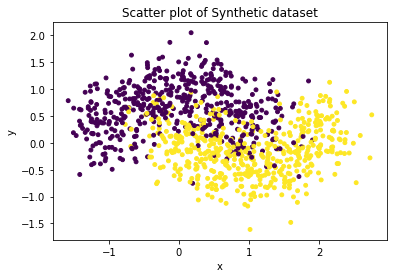

In [9]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import random
%matplotlib inline

#(a) Create Synthetic dataset
x, y = make_moons(n_samples=1000, noise=0.35)


#(b) Scatter plots 
plt.title("Scatter plot of Synthetic dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x[:,0],x[:,1],c=y, s=15)
plt.show()

In [10]:
#(C)
idx1 = random.sample(range(1,1000),100)
x1 = x[idx1]
y1 = y[idx1]

idx2 = random.sample(range(1,1000),100)
x2 = x[idx2]
y2 = y[idx2]

idx3 = random.sample(range(1,1000),100)
x3 = x[idx3]
y3 = y[idx3]

In [11]:
k1_1 = KNeighborsClassifier(n_neighbors=1)
k1_1.fit(x1,y1)
k1_2 = KNeighborsClassifier(n_neighbors=25)
k1_2.fit(x1,y1)
k1_3 = KNeighborsClassifier(n_neighbors=50)
k1_3.fit(x1,y1)

k2_1 = KNeighborsClassifier(n_neighbors=1)
k2_1.fit(x2,y2)
k2_2 = KNeighborsClassifier(n_neighbors=25)
k2_2.fit(x2,y2)
k2_3 = KNeighborsClassifier(n_neighbors=50)
k2_3.fit(x2,y2)


k3_1 = KNeighborsClassifier(n_neighbors=1)
k3_1.fit(x3,y3)
k3_2 = KNeighborsClassifier(n_neighbors=25)
k3_2.fit(x3,y3)
k3_3 = KNeighborsClassifier(n_neighbors=50)
k3_3.fit(x3,y3)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [12]:
from matplotlib.colors import ListedColormap
def plotDecisionBoundary(x,y,knn_model,k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    h = 0.02
    xx,yy = np.meshgrid(np.arange(-2,3),np.arange(-2,2))
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Decision Boundary (k = {})".format(k))

<Figure size 1080x1080 with 0 Axes>

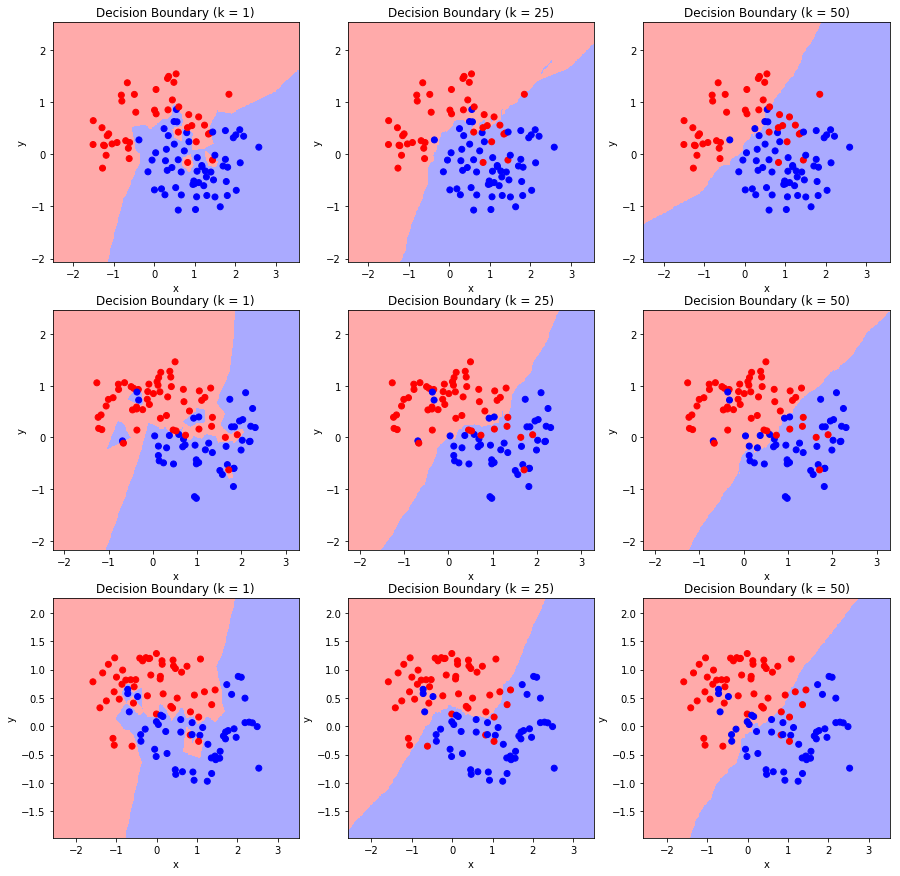

In [13]:
#(d)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 15
plt.figure()
plt.subplots(3,3)

#Dataset 1
plt.subplot(331)
plotDecisionBoundary(x1,y1,k1_1, 1)
plt.subplot(332)
plotDecisionBoundary(x1,y1,k1_2, 25)
plt.subplot(333)
plotDecisionBoundary(x1,y1,k1_3, 50)

#datset 2
plt.subplot(334)
plotDecisionBoundary(x2,y2,k2_1, 1)
plt.subplot(335)
plotDecisionBoundary(x2,y2,k2_2, 25)
plt.subplot(336)
plotDecisionBoundary(x2,y2,k2_3, 50)

#dataset 3
plt.subplot(337)
plotDecisionBoundary(x3,y3,k3_1, 1)
plt.subplot(338)
plotDecisionBoundary(x3,y3,k3_2, 25)
plt.subplot(339)
plotDecisionBoundary(x3,y3,k3_3, 50)

plt.show()

(e)

I notice from each of the plot that has K=1 are overfitting as none of the points are misclassified and k=50 is underfitting as more numbers of points are misclassified. This appears to be true for all the three dataset.
It can be seen that the model with K =25 is performing the best. The decision boundary has a slight "S" curve.
It can be noted that the the decision boundary that vary the most with the dataset is for the KNN model with K=1. Conversely, the decision boundary which vary the least is for the KNN model with K= 50.



(f)

The bias-variance  tradeoff can be seen in the above plots for each of the dataset along the X axis. It can be seen for the model with the lowest K value (K=1) the data is tightly fit (overfit). This result in high variance between the decision boundaries of the models with K=1 for each of the dataset.

For the KNN model with highest K value (K=50), it can be seen that the model is underfitting the data. This results in higher bias between the decision boundaries of the models with K value equal to K=50 for each of the dataset. Here the decision boundary is relatively constant between each dataset but it does not follow the optiomal curve. 

The best fitting model here is for K= 25 which has the fairly consant decision boundary across all dataset and follows an optimal curve.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [14]:
#(a)
x_train, y_train = x, y # x and y are previous created datset
x_test, y_test = make_moons(n_samples=1000, noise=0.35)


<function matplotlib.pyplot.show(*args, **kw)>

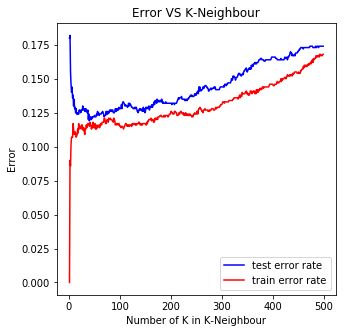

In [15]:
#(b)
score_test =[]
score_train =[]
for i in range(1,500):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    score_train.append(1 - metrics.accuracy_score(y_train,y_pred_train))
    score_test.append(1- metrics.accuracy_score(y_test,y_pred_test))
plt.figure(figsize=(5,5)) 
plt.plot(range(1,500) ,score_test,label='test error rate', color='b')
plt.plot(range(1,500) ,score_train, label='train error rate', color='r')
plt.title("Error VS K-Neighbour")
plt.xlabel("Number of K in K-Neighbour")
plt.ylabel("Error")
plt.legend()
plt.show

(c)

We can see that the training error increases rapidly as the value of K increases for the first interval. This is due to the model overfitting to the training data which results in very high test error. As the value of K increases from 50 to 220, we can see that model is becoming more genralized and test and train error are not increasing too much as the value of K increases. As the value of K increases from 220 to 500, we can see that both train and test error are increasing which indicates high bias in the model. 

(d)

High Variance: The value of K closer to 1, for example, 1 to 24

High Bias: The values of K closer to 500, for exampe 400 to 500


In [16]:
#(e)
min_value = min(score_test)
opt_k = score_test.index(min_value )
print(f"The optimal value of K is {opt_k}")

The optimal value of K is 39


(f)

In other models such as random forest, the model flexibility is controlled by hyperparemeters such as number of trees, min leaf, min split parmeters. In neural network, it is controlled by number of neurons. In LDA topic model, it is controlled by number of topics. 


## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [17]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

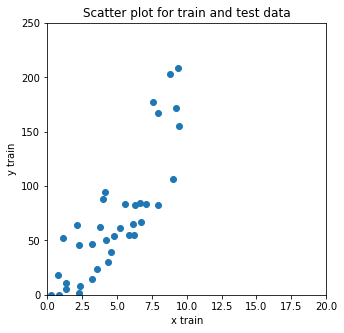

In [18]:
#(a) scatter plot
plt.figure(figsize=(5,5))
plt.title("Scatter plot for train and test data")
plt.scatter(x_train,y_train)
plt.xlim(0,20)
plt.ylim(0,250)
plt.xlabel('x train')
plt.ylabel('y train')
plt.show()

In [19]:
#(b)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import itertools

x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_test =  np.array(y_test).reshape(-1,1)

reg = LinearRegression().fit( x_train, y_train )
y_pred = reg.predict(x_train)
r2_score = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)

In [20]:
print(f"r_square = {r2_score},  mean square error = {mse}")
print(f"Model eqaution: y = {reg.coef_[0][0]}*x + {reg.intercept_[0]}")

r_square = 0.7014590913812251,  mean square error = 1052.5853662498014
Model eqaution: y = 18.303206847693165*x + -21.73078292905422


In [21]:
#(C)

x_train_sq = np.square(x_train)
x_train_new = np.concatenate((x_train, x_train_sq), axis=1)
reg1 = LinearRegression().fit(x_train_new, y_train)

y_pred_new = reg1.predict(x_train_new)
r2_score_new = reg1.score(x_train_new, y_train)
mse_new = mean_squared_error(y_train, y_pred_new)

print(f"r_square = {r2_score_new},  mean square error = {mse_new}")
print(f"Model eqaution: y = {reg1.coef_[0][0]}*x + {reg1.coef_[0][1]}*x^2 + {reg1.intercept_[0]}")

r_square = 0.7490480719353505,  mean square error = 884.797759660905
Model eqaution: y = 0.47100686043853707*x + 1.8320819097372598*x^2 + 8.007337461589657


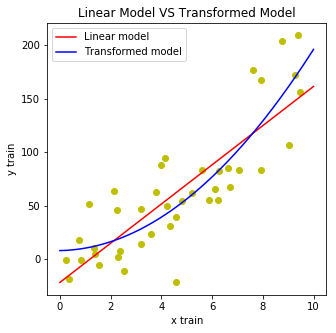

In [22]:
#(d)

x = np.linspace(0, 10, 1000)
plt.figure(figsize=(5,5))
plt.scatter(x_train, y_train, color='y')
plt.plot(x, reg.coef_[0][0]*x + reg.intercept_[0], label='Linear model', color='r')
plt.plot(x, reg1.coef_[0][0]*x +reg1.coef_[0][1] *x**2 + reg1.intercept_[0], label='Transformed model', color='b')
plt.xlabel('x train')
plt.ylabel('y train')
plt.title('Linear Model VS Transformed Model')
plt.legend()
plt.show()

In [23]:
# (e) 

y_test_pred = reg.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = reg.score(x_test, y_test)
print(f'R-squared for original model on test data: {r2_test}')
print(f'The mean squared error for  original model on test data: {mse_test}')
x_test_sq = np.square(x_test)
x_test_new = np.concatenate((x_test, x_test_sq), axis=1)
y_test_pred_new = reg1.predict(x_test_new)
mse_test_new = mean_squared_error(y_test, y_test_pred_new)
r2_test_new = reg1.score(x_test_new, y_test)
print(f'R-squared value for new model on test data: {r2_test_new}')
print(f'The mean squared error for new model  on test data: {mse_test_new}')

R-squared for original model on test data: 0.5556465885794163
The mean squared error for  original model on test data: 2023.3121088887128
R-squared value for new model on test data: 0.6927820089560344
The mean squared error for new model  on test data: 1398.8817580143948


(f)

It can be seen that the transformed model performed better on both the training data and testing data. This is becuase transformed model has better r square value and lower mean square error on both training and testing data.

The r sqaured value of the training data for the transformed model (0.749) is higher compared to r squared value in original model (0.701).

The r sqaured value of the testing data for the transformed model (0.69) is higher compared to r squared value in original model (0.55).

The mean square error of the training data for the transformed model (884.79) is lower compared to mean square error in original model (1052.58).

The mean square error of the testing data for the transformed model (1398.881) is lower compared to mean square error in original model (2023.31).


(g)

If the test data is significantly different from training dataset then the model would perform poorly and the predictive capability of the model would be negatively impacted. This is beacuse  model would have been trained on a completely different data compared to the test data, and when the model is evaluated on the test data, it would not be able to genaralize to the test data and hence would result in very low accuracy
